# Reinforcement Learning Projekt

In [2]:
# loading packages
import gym
import numpy as np
import random
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from hyperopt import fmin, tpe, hp

### Erstellen des RL-Agent

In [3]:
# Definition des Q-Learning-Agenten
class QLearningAgent:
    def __init__(self, state_space_size, action_space_size):
        self.state_space_size = state_space_size
        self.action_space_size = action_space_size
        self.epsilon = 1.0  # Anfangswert für die Erkundungswahrscheinlichkeit
        self.epsilon_decay = 0.995  # Faktor zur Verringerung der Erkundungswahrscheinlichkeit
        self.epsilon_min = 0.01  # Minimale Erkundungswahrscheinlichkeit
        self.learning_rate = 0.001  # Lernrate für das neuronale Netz
        self.discount_factor = 0.99  # Rabattfaktor für zukünftige Belohnungen
        self.model = self._build_model()  # Erstellung des neuronalen Netzwerks

    def _build_model(self):
        # Definition des neuronalen Netzwerks als Q-Funktion Approximator
        model = keras.Sequential([
            layers.Dense(24, input_shape=(self.state_space_size,), activation='relu'),
            layers.Dense(24, activation='relu'),
            layers.Dense(self.action_space_size, activation='linear')
        ])
        model.compile(loss='mse', optimizer=keras.optimizers.Adam(lr=self.learning_rate))
        return model

    def choose_action(self, state, return_explore_action=False):
        # Wählt eine Aktion basierend auf der Erkundungswahrscheinlichkeit oder Q-Werte
        if np.random.rand() < self.epsilon:
            if return_explore_action:
                return random.randrange(self.action_space_size), True
            else:
                return random.randrange(self.action_space_size)
        q_values = self.model.predict(state)
        action = np.argmax(q_values[0])
        if return_explore_action:
            return action, False
        else:
            return action

    def train(self, state, action, reward, next_state, done):
        # Training des Agenten basierend auf Q-Learning
        target = reward
        if not done:
            target = reward + self.discount_factor * np.amax(self.model.predict(next_state)[0])
        target_f = self.model.predict(state)
        target_f[0][action] = target
        self.model.fit(state, target_f, epochs=1, verbose=0)

        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay
        
# definieren von Evaluationsfunktion
def evaluate_agent(env, agent, episodes=500):
    # Bewertet den Agenten über eine bestimmte Anzahl von Testepisoden (hier auf 500 geändert)
    total_rewards = []
    for episode in range(episodes):
        state = env.reset()
        state = np.reshape(state, [1, env.observation_space.shape[0]])
        total_reward = 0
        done = False
        while not done:
            action = agent.choose_action(state)
            next_state, reward, done, _ = env.step(action)
            next_state = np.reshape(next_state, [1, env.observation_space.shape[0]])
            state = next_state
            total_reward += reward
        total_rewards.append(total_reward)
    return np.mean(total_rewards)

### Training des RL-Agenten

In [4]:
# Initialisierung der CartPole-Umgebung und des RL-Agenten
env = gym.make('CartPole-v1')
agent = QLearningAgent(state_space_size=env.observation_space.shape[0], action_space_size=env.action_space.n)

Im folgenden Teil des Codes wird der Q-Learning-Agent trainert und seine Leistung in regelmäßigen Intervallen überwacht:



In [ ]:
# Trainieren des Agenten mit Evaluation in bestimmten Intervallen
train_episodes = 500
evaluation_interval = 25

# Listen zum Speichern der Belohnungen pro Episode und des Explorations-Exploitations-Verhältnisses
episode_rewards = []
exploration_exploitation_ratio = []

for episode in range(train_episodes):
    state = env.reset()
    state = np.reshape(state, [1, env.observation_space.shape[0]])
    total_reward = 0
    total_explore_actions = 0
    total_exploit_actions = 0
    done = False

    while not done:
        action, explore_action = agent.choose_action(state, return_explore_action=True)
        next_state, reward, done, _ = env.step(action)
        next_state = np.reshape(next_state, [1, env.observation_space.shape[0]])
        agent.train(state, action, reward, next_state, done)
        state = next_state
        total_reward += reward

        if explore_action:
            total_explore_actions += 1
        else:
            total_exploit_actions += 1

    episode_rewards.append(total_reward)

    if (episode + 1) % evaluation_interval == 0:
        average_reward = evaluate_agent(env, agent, episodes=evaluation_interval)
        print(f"Episode: {episode + 1}, Total Reward: {total_reward}, Average Reward: {average_reward}")

    # Berechnung des Explorations-Exploitations-Verhältnisses für die Episode
    explore_exploit_ratio = total_explore_actions / (total_explore_actions + total_exploit_actions)
    exploration_exploitation_ratio.append(explore_exploit_ratio)


To minimize the output, the following is a screenshot of the output, otherwise it will be 10000+lines

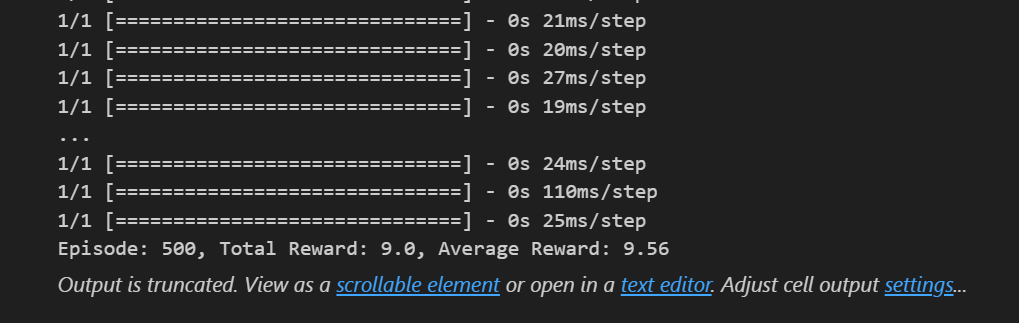

#### Interpretation
- "Episode: 500": Dies deutet darauf hin, dass du den Agenten in 500 Episoden trainiert hast.

- "Total Reward: 9.0": In einer einzelnen Episode hat der Agent eine Gesamtbelohnung von 9.0 erhalten. Die Gesamtbelohnung ist die summierte Belohnung über alle Zeitschritte in einer Episode.

- "Average Reward: 9.56": Dies ist der durchschnittliche Wert der Gesamtbelohnung über die 500 Episoden. Es bedeutet, dass der Agent im Durchschnitt 9.56 Belohnungspunkte pro Episode erhalten hat.


In deinem Fall zeigt eine durchschnittliche Belohnung von 9.56, dass der Agent ein gewisses Maß an Lernen erreicht hat und eine positive Leistung erzielt. Allerdings ist eine durchschnittliche Belohnung von 9.56 in der CartPole-Umgebung noch nicht ausreichend, um die Umgebung als gelöst zu betrachten.

Um die Leistung des Agenten weiter zu verbessern und die CartPole-Umgebung als "gelöst" zu betrachten, strebe ich eine durchschnittliche Belohnung von mindestens 50 über mehrere Episoden hinweg an. Es sollte irgendwie gezeigt werden, dass der Agent den Stab für eine ausreichende Anzahl von Schritten ausbalancieren kann, um die Umgebung erfolgreich zu meistern. Im Weiteren Verlauf nach der Initial Visualisierung, werde ich versuchen, das Ergebnis zu optimieren, oder zu mindestens versuchen zu erhöhen


 #

###

## Visualisierung

#### Interpretation von Belohnungsentwicklung während des Trainings

Wenn die Belohnungsentwicklung zu Beginn bei ca.12 liegt und dann ab der 25. Episode variabel mehr oder weniger mit verinzelten Ausnahmen zwischen 9 und 10 bleibt, kann dies bedeuten, dass der Agent zuerst eine schnellere Lernphase durchläuft, in der er das Spielverhalten verbessert und die Belohnungen steigen. Nach dieser anfänglichen Verbesserung erreicht der Agent möglicherweise ein Plateau, auf dem er eine gewisse Konsistenz in den Belohnungen zeigt. Ein stabiler Wert um 9 bis 10 deutet darauf hin, dass der Agent möglicherweise die Fähigkeit entwickelt hat, den Stab für längere Zeit im Gleichgewicht zu halten, aber er hat möglicherweise Schwierigkeiten, die Belohnung weiter zu erhöhen.

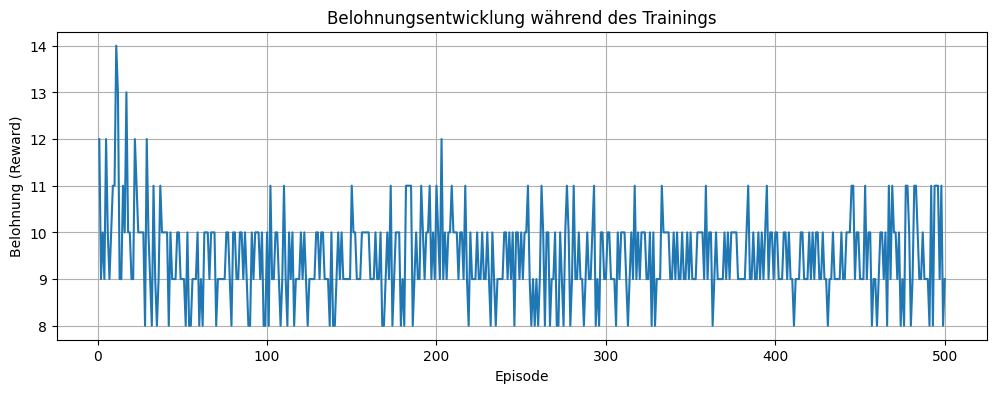

In [22]:
# Plot der Belohnungsentwicklung
plt.figure(figsize=(12, 4))
plt.plot(range(1, train_episodes + 1), episode_rewards)
plt.xlabel('Episode')
plt.ylabel('Belohnung (Reward)')
plt.title('Belohnungsentwicklung während des Trainings')
plt.grid(True)
plt.show()

#### Interpretation des Exploration-Exploitations-Verhältnisses

Wenn das Explorations-Exploitations-Verhältnis zu Beginn einen hohen Wert von 0,35 hat und dann im Verlauf der Episoden lokale Maxima von max. 0,1 erreicht, deutet dies darauf hin, dass der Agent möglicherweise zu Beginn mehr Exploration (zufällige Aktionen) durchgeführt hat, um die Umgebung zu erkunden und möglicherweise bessere Aktionen zu finden. Im Laufe des Trainings hat der Agent jedoch mehr gelernt und sich an das Verhalten erinnert, das zu positiven Belohnungen führt, und daher verringert er die Anzahl der zufälligen Aktionen (Exploitation erhöht sich).

#### 

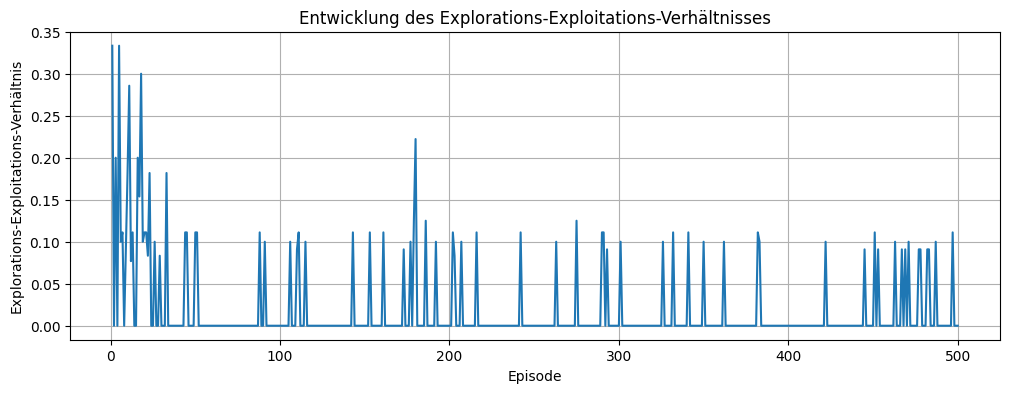

In [23]:
# Plot des Explorations-Exploitations-Verhältnisses
plt.figure(figsize=(12, 4))
plt.plot(range(1, train_episodes + 1), exploration_exploitation_ratio)
plt.xlabel('Episode')
plt.ylabel('Explorations-Exploitations-Verhältnis')
plt.title('Entwicklung des Explorations-Exploitations-Verhältnisses')
plt.grid(True)
plt.show()

#### Interpretation der Initial Visualisierung

Die beiden Plots, reichen für die Darstellung des Trainingsverlaufs und der Ergebnisse mit geeigneten und verständlichen Visualisierungen aus. Die Plots geben eine klare Vorstellung von der Entwicklung der Belohnung während des Trainings sowie des Explorations-Exploitations-Verhältnisses.

Mit dem Plot der Belohnungsentwicklung kann man den Trainingsfortschritt des RL-Agenten verfolgen und sehen, wie sich die Belohnung im Verlauf der Episoden ändert. Ein ansteigender Trend deutet auf eine Verbesserung des Agenten hin, während ein instabiles oder abnehmendes Verhalten auf eine mangelnde Lernfähigkeit hindeuten kann. Das zweite Plot des Explorations-Exploitations-Verhältnisses zeigt, wie oft der Agent zufällige Aktionen im Vergleich zu gelernten Aktionen auswählt. Dies kann helfen, die Explorations-Exploitations-Strategie des Agents zu bewerten. Ein ausgewogenes Verhältnis ist wichtig, um sowohl die Umgebung zu erkunden als auch gelernte Kenntnisse effizient zu nutzen.

Zusammen bieten diese beiden Plots eine umfassende und verständliche Darstellung des Trainingsverlaufs und der Ergebnisse des RL-Agenten in der CartPole-Umgebung. Sie können die Leistung des Agents bewerten, Verbesserungen im Laufe des Trainings erkennen und mögliche Bereiche für weitere Optimierungen identifizieren.


#

#

## Optimierung durch Hyperparameter Tuning
In diesem Projekt verwende ich Hyperopt.
Hyperopt ist eine Python-Bibliothek, die für das Hyperparameter-Tuning und die Optimierung von maschinellen Lernalgorithmen entwickelt wurde. Das Ziel von Hyperopt besteht darin, dabei zu helfen, die besten Hyperparameter für das Modell zu finden, indem es eine systematische Suche im Hyperparameter-Raum durchführt.

Vorteile von Hyperopt:
-  Effiziente Suche im Hyperparameter-Raum durch Bayesianische Optimierung.
- Vermeidung von zeitaufwändigen Gittersuchen oder Zufallssuchen.
- Automatische Anpassung der Suchstrategie basierend auf den beobachteten Ergebnissen.
- Einfache Integration mit gängigen maschinellen Lernalgorithmen.

In [5]:
# Definition des Suchraums für die Hyperparameter
space = {
    'learning_rate': hp.uniform('learning_rate', 0.0001, 0.1),
    'discount_factor': hp.uniform('discount_factor', 0.9, 0.9999)
}

In [6]:
# Funktion zur Optimierung der Hyperparameter
def optimize_hyperparameters(params):
    # Extrahiere die Hyperparameter
    learning_rate = params['learning_rate']
    discount_factor = params['discount_factor']

    # Initialisierung der CartPole-Umgebung und des RL-Agenten
    env = gym.make('CartPole-v1')
    agent = QLearningAgent(state_space_size=env.observation_space.shape[0], action_space_size=env.action_space.n)
    agent.learning_rate = learning_rate
    agent.discount_factor = discount_factor

    # Trainieren des Agenten mit Evaluation in bestimmten Intervallen
    train_episodes = 500
    evaluation_interval = 25

    episode_rewards = []
    exploration_exploitation_ratio = []

    for episode in range(train_episodes):
        state = env.reset()
        state = np.reshape(state, [1, env.observation_space.shape[0]])
        total_reward = 0
        total_explore_actions = 0
        total_exploit_actions = 0
        done = False

        while not done:
            action, explore_action = agent.choose_action(state, return_explore_action=True)
            next_state, reward, done, _ = env.step(action)
            next_state = np.reshape(next_state, [1, env.observation_space.shape[0]])
            agent.train(state, action, reward, next_state, done)
            state = next_state
            total_reward += reward

            if explore_action:
                total_explore_actions += 1
            else:
                total_exploit_actions += 1

        episode_rewards.append(total_reward)

        if (episode + 1) % evaluation_interval == 0:
            average_reward = evaluate_agent(env, agent, episodes=evaluation_interval)
            print(f"Episode: {episode + 1}, Total Reward: {total_reward}, Average Reward: {average_reward}")

        explore_exploit_ratio = total_explore_actions / (total_explore_actions + total_exploit_actions)
        exploration_exploitation_ratio.append(explore_exploit_ratio)

    # Rückgabe des negativen Durchschnitts der Episode-Belohnungen, da Hyperopt nach Minimierung sucht
    return -np.mean(episode_rewards)


In [10]:

# Ausführen der Zufallsuche mit Hyperopt
best = fmin(fn=optimize_hyperparameters, space=space, algo=tpe.suggest, max_evals=3)
#max_eval beeinflusst letztendlich die Wahrscheinlichkeit, qualitative Hyperparameters zu finden. Aber je mehr evals desto zeit- und resourcenaufwendiger wird es. Hier habe ich mich für 5 entschieden

print("Beste Hyperparameter:")
print(best)

TypeError: fmin() got an unexpected keyword argument 'workers'